In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv("globalterrorism.csv")
dataset.head()

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [8]:
dataset.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day', 'country_txt':'Country','provstate':'state',
                         'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [9]:
#Removing columns which are not required 
dataset = dataset[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
                      'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
dataset.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [10]:
dataset.isnull().any()

Year           False
Month          False
Day            False
Country        False
state           True
Region         False
city            True
latitude        True
longitude       True
AttackType     False
Killed          True
Wounded         True
Target          True
Summary         True
Group          False
Target_type    False
Weapon_type    False
Motive          True
dtype: bool

In [24]:
dataset['Wounded'] = dataset['Wounded'].fillna(0).astype(int)
dataset['Killed'] = dataset['Killed'].fillna(0).astype(int)
dataset['casualities'] = dataset['Killed'] + dataset['Wounded']

<ipython-input-24-bdbd24b6ad6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Wounded'] = dataset['Wounded'].fillna(0).astype(int)
<ipython-input-24-bdbd24b6ad6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Killed'] = dataset['Killed'].fillna(0).astype(int)
<ipython-input-24-bdbd24b6ad6e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [11]:
dataset.describe(include='all')

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
count,181691.000000,181691.000000,181691.000000,181691,181270,181691,181257,177135.000000,1.771340e+05,181691,171378.000000,165380.000000,181055,115562,181691,181691,181691,50561
unique,NaN,NaN,NaN,205,2854,12,36674,NaN,NaN,9,NaN,NaN,86006,112492,3537,22,12,14490
top,NaN,NaN,NaN,Iraq,Baghdad,Middle East & North Africa,Unknown,NaN,NaN,Bombing/Explosion,NaN,NaN,Civilians,"09/00/2016: Sometime between September 18, 201...",Unknown,Private Citizens & Property,Explosives,Unknown
freq,NaN,NaN,NaN,24636,7645,50474,9775,NaN,NaN,88255,NaN,NaN,6461,100,82782,43511,92426,14889
mean,2002.638997,6.467277,15.505644,NaN,NaN,NaN,NaN,23.498343,-4.586957e+02,NaN,2.403272,3.167668,NaN,NaN,NaN,NaN,NaN,NaN
std,13.259430,3.388303,8.814045,NaN,NaN,NaN,NaN,18.569242,2.047790e+05,NaN,11.545741,35.949392,NaN,NaN,NaN,NaN,NaN,NaN
min,1970.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,-53.154613,-8.618590e+07,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1991.000000,4.000000,8.000000,NaN,NaN,NaN,NaN,11.510046,4.545640e+00,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,2009.000000,6.000000,15.000000,NaN,NaN,NaN,NaN,31.467463,4.324651e+01,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2014.000000,9.000000,23.000000,NaN,NaN,NaN,NaN,34.685087,6.871033e+01,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
print('Country with most attacks: ',dataset['Country'].value_counts().idxmax())
print('City with most attacks: ',dataset['city'].value_counts().index[1])
print("Region with the most attacks:",dataset['Region'].value_counts().idxmax())
print("Year with the most attacks:",dataset['Year'].value_counts().idxmax())
print("Month with the most attacks:",dataset['Month'].value_counts().idxmax())
print("Group with the most attacks:",dataset['Group'].value_counts().index[1])
print("Most Attack Types:",dataset['AttackType'].value_counts().idxmax())

Country with most attacks:  Iraq
City with most attacks:  Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


In [13]:
#Attacks in every Year in the World
dataset['Year'].value_counts(dropna=False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

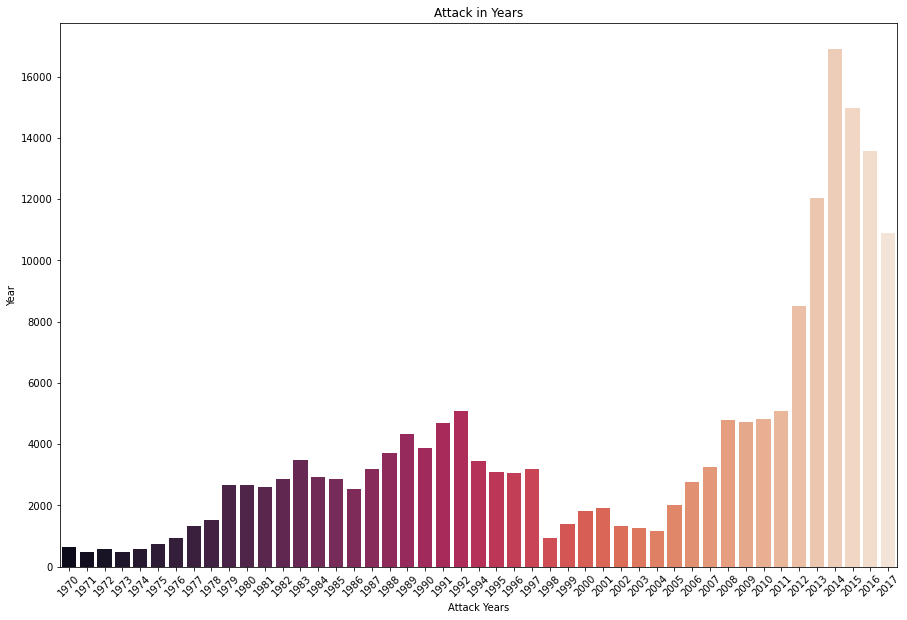

In [15]:
#Bar Plot
x_year = dataset['Year'].unique()
y_year = dataset['Year'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(15,10))
plt.title("Attack in Years")
plt.xlabel("Attack Years")
plt.ylabel("Number of attacks each year")
plt.xticks(rotation=45)
sns.barplot(x=x_year, y=y_year, palette= 'rocket')
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


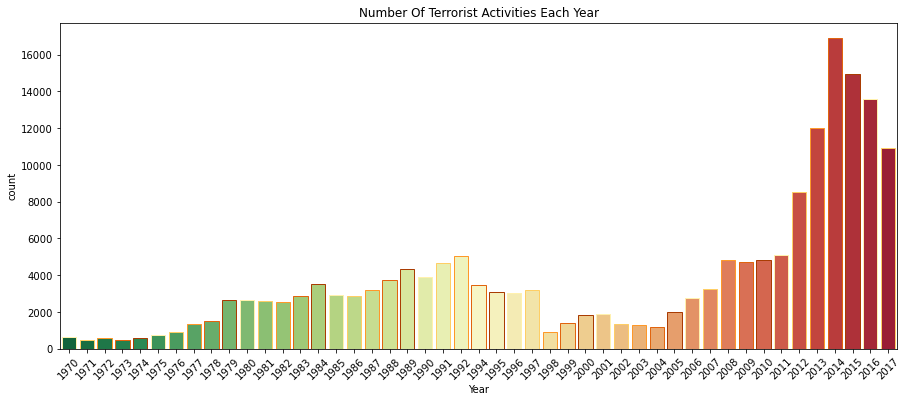

In [17]:
#Count Plot
plt.subplots(figsize=(15,6))
sns.countplot('Year', data=dataset, palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 5))
plt.xticks(rotation=45)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

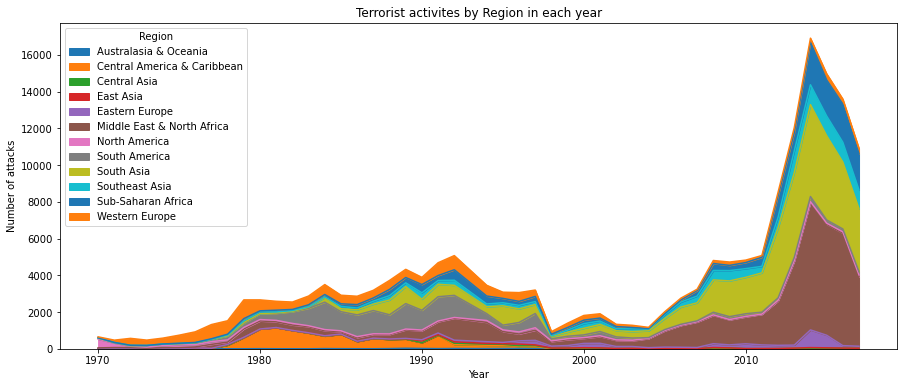

In [18]:
#Area Plot
pd.crosstab(dataset.Year,dataset.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist activites by Region in each year')
plt.ylabel("Number of attacks")
plt.show()

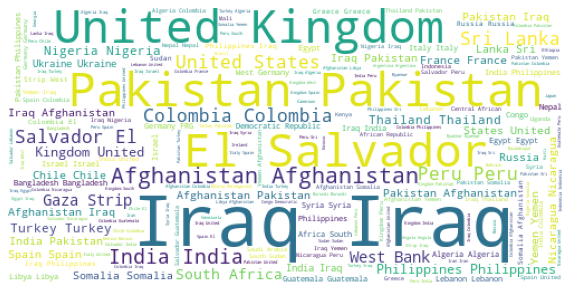

In [23]:
Country=dataset.Country.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud= WordCloud(background_color='white', width=500, height = 250).generate(' '.join(Country))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [30]:
terror_copy = dataset.sort_values(by='casualities',ascending=False)
terror_copy.corr()

,Year,Month,Day,latitude,longitude,Killed,Wounded,casualities
Year,1.000000,0.000139,0.018254,0.166933,0.003917,0.021252,0.017484,0.020675
Month,0.000139,1.000000,0.005497,-0.015978,-0.003880,0.004031,0.003178,0.003805
Day,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.003225,-0.001082,-0.001808
latitude,0.166933,-0.015978,0.003423,1.000000,0.001463,-0.013170,0.015921,0.009899
longitude,0.003917,-0.003880,-0.002285,0.001463,1.000000,-0.000587,0.000205,0.000013
Killed,0.021252,0.004031,-0.003225,-0.013170,-0.000587,1.000000,0.443326,0.651885
Wounded,0.017484,0.003178,-0.001082,0.015921,0.000205,0.443326,1.000000,0.968724
casualities,0.020675,0.003805,-0.001808,0.009899,0.000013,0.651885,0.968724,1.000000


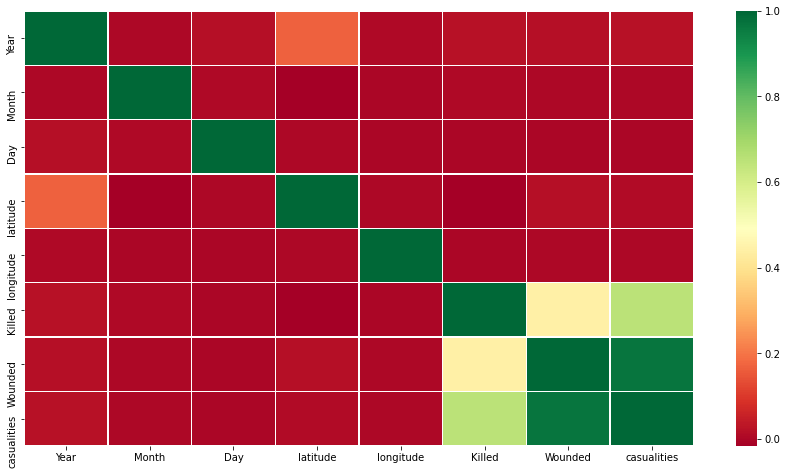

In [31]:
#Generating heatmap for correlation plot
plt.figure(figsize=[15,8])
sns.heatmap(terror_copy.corr(),cmap='RdYlGn', linewidths=0.4)
plt.show()

In [32]:
attack_country = dataset.Country.value_counts()[:15]
attack_country

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


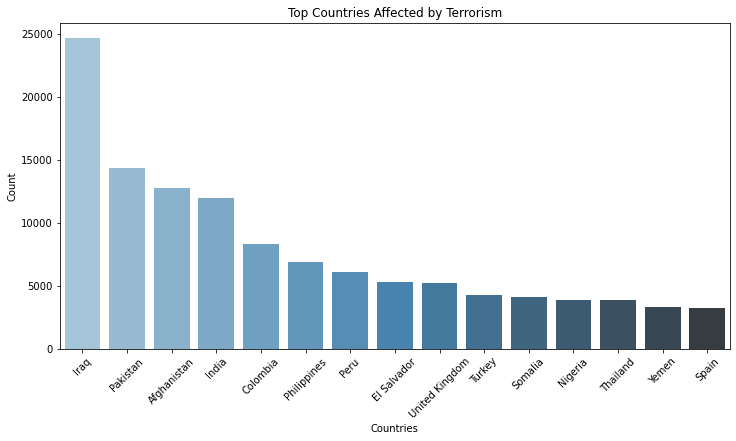

In [34]:
plt.subplots(figsize=(12,6))
sns.barplot(attack_country.index,attack_country.values,palette='Blues_d')
plt.title('Top Countries Affected by Terrorism')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 45)
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


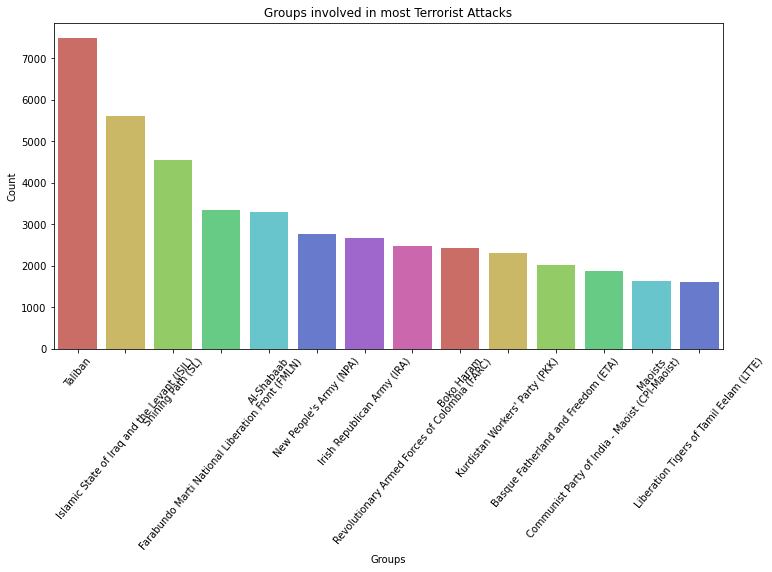

In [37]:
attack_groups = dataset.Group.value_counts()[1:15]
plt.subplots(figsize=(12,6))
sns.barplot(attack_groups.index,attack_groups.values,palette=sns.color_palette("hls", 8))
plt.title('Groups involved in most Terrorist Attacks')
plt.xlabel('Groups')
plt.ylabel('Count')
plt.xticks(rotation= 50)
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


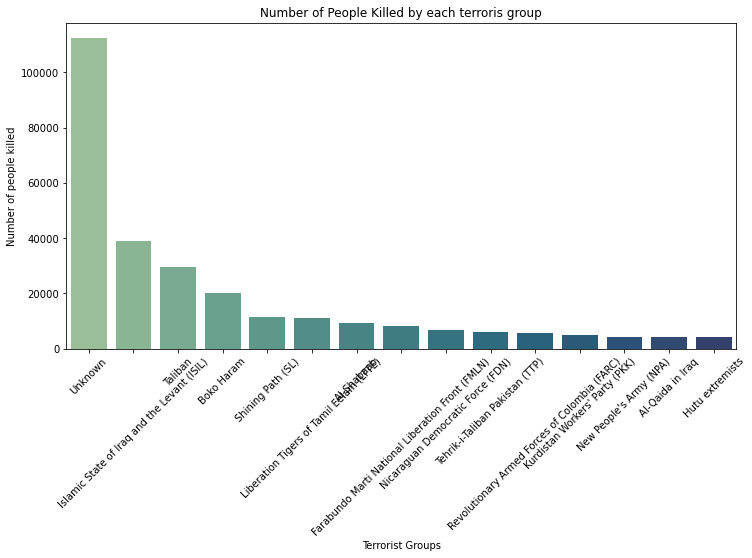

In [40]:
#People Killed by each group in terrorist activity
group_killed= dataset[['Group','Killed']].groupby(['Group'],axis=0).sum().sort_values('Killed', ascending=False).head(15)
plt.subplots(figsize=(12,6))
sns.barplot(group_killed.index, group_killed.Killed.values,palette="crest")
plt.title('Number of People Killed by each terroris group')
plt.xlabel('Terrorist Groups')
plt.ylabel('Number of people killed')
plt.xticks(rotation= 45)
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


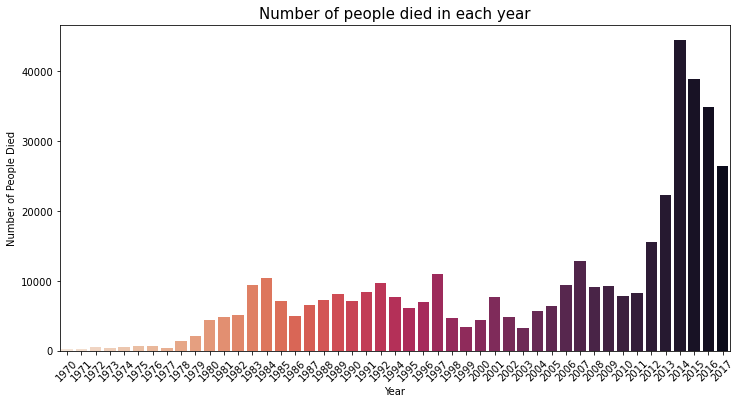

In [41]:
died_people = dataset[['Year','Killed']].groupby(['Year']).sum()
plt.subplots(figsize=(12,6))
sns.barplot(died_people.index, died_people.Killed.values,palette="rocket_r")
plt.title("Number of people died in each year",fontsize=15)
plt.ylabel("Number of People Died")
plt.xlabel('Year')
plt.xticks(rotation = 45)
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


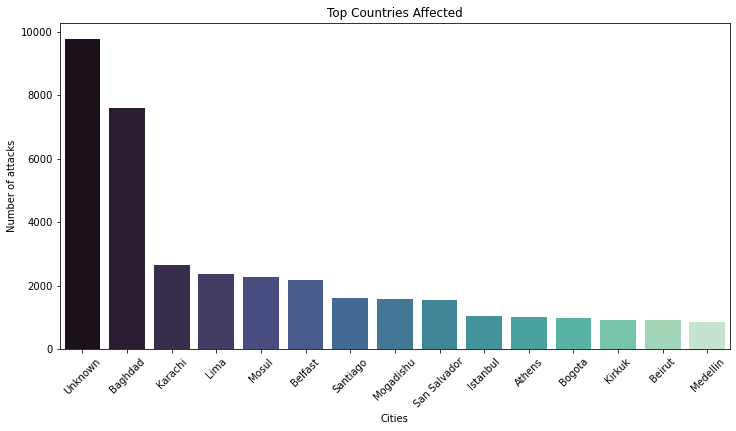

In [42]:
# Top Countries affected
attack_cities = dataset.city.value_counts()[:15]
attack_cities
plt.subplots(figsize=(12,6))
sns.barplot(attack_cities.index,attack_cities.values,palette="mako")
plt.title('Top Countries Affected')
plt.xlabel('Cities')
plt.ylabel('Number of attacks')
plt.xticks(rotation= 45)
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


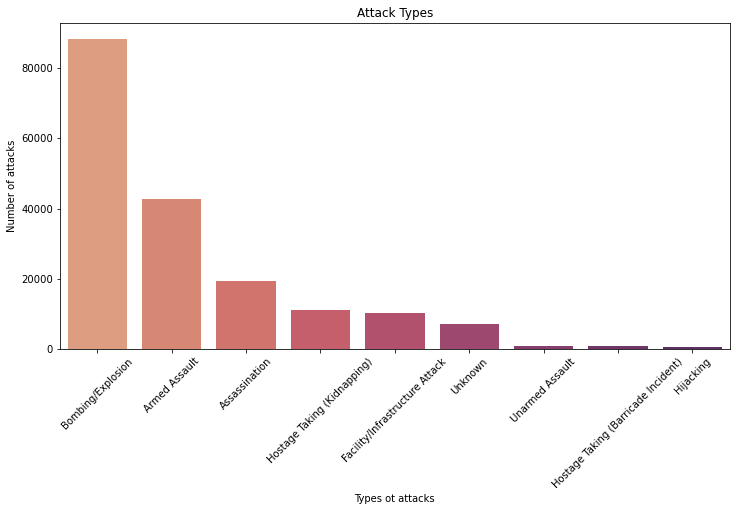

In [43]:
#Type of Attacks 
attack_type = dataset.AttackType.value_counts()[:15]
plt.subplots(figsize=(12,6))
sns.barplot(attack_type.index,attack_type.values,palette="flare")
plt.title('Attack Types')
plt.xlabel('Types ot attacks')
plt.ylabel('Number of attacks')
plt.xticks(rotation= 45)
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


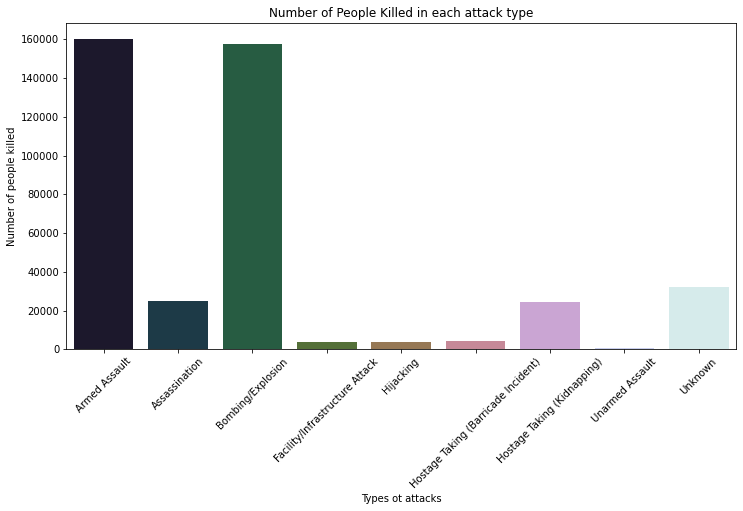

In [44]:
# People Killed in each attack type
attack_killed = dataset[['AttackType','Killed']].groupby(["AttackType"],axis=0).sum()
plt.subplots(figsize=(12,6))
sns.barplot(attack_killed.index, attack_killed.Killed.values,palette="cubehelix")
plt.title('Number of People Killed in each attack type')
plt.xlabel('Types ot attacks')
plt.ylabel('Number of people killed')
plt.xticks(rotation= 45)
plt.show()